In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_spss('/content/drive/MyDrive/Colab Notebooks/문화관광공모전/data/2022_외래관광객조사_Data.SAV')

In [ ]:
df.head()

,id,Q1,RQ1,Q3,Q3B1,Q3B2,Q3B3,Q4,Q4A01,Q4A02,...,Q9,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_PLA,D_Q1,D_TYP
0,276.0,1.0,1회,교육,NaN,NaN,NaN,개별여행,식도락 관광,쇼핑,...,⑤ 매우 그렇다,1 월,1 분 기,프 랑 스,여 성,21 - 30 세,교 육,인 천 공 항 T2,1 회,개 별 여 행
1,283.0,1.0,1회,교육,NaN,NaN,NaN,개별여행,식도락 관광,쇼핑,...,⑤ 매우 그렇다,1 월,1 분 기,프 랑 스,여 성,21 - 30 세,교 육,인 천 공 항 T2,1 회,개 별 여 행
2,286.0,1.0,1회,교육,NaN,NaN,NaN,개별여행,식도락 관광,쇼핑,...,⑤ 매우 그렇다,1 월,1 분 기,프 랑 스,남 성,21 - 30 세,교 육,인 천 공 항 T2,1 회,NaN
3,289.0,4.0,4회 이상,친구/친지 방문,기타,NaN,NaN,개별여행,식도락 관광,쇼핑,...,⑤ 매우 그렇다,1 월,1 분 기,프 랑 스,남 성,21 - 30 세,친 구/친 지 방 문,인 천 공 항 T2,4 회 이 상,개 별 여 행
4,300.0,1.0,1회,교육,NaN,NaN,NaN,개별여행,식도락 관광,쇼핑,...,⑤ 매우 그렇다,1 월,1 분 기,중 국,여 성,21 - 30 세,교 육,김 해 공 항,1 회,개 별 여 행


In [ ]:
df1=df[df['Q3'].isin(['여가/위락/휴식','친구/친지 방문'])]
df1=df1[['Q3B1','Q3B2','Q3B3',
        'Q4A01','Q4A02','Q4A03','Q4A04','Q4A05','Q4A06','Q4A07','Q4A08',
        'Q4A09','Q4A10','Q4A11','Q4A12','Q4A13','Q4A14','Q4A15','Q4A16','Q4A17',
        'Q4B1','Q4B2','Q4B3']]

In [ ]:
df1.head()

,Q3B1,Q3B2,Q3B3,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,...,Q4A11,Q4A12,Q4A13,Q4A14,Q4A15,Q4A16,Q4A17,Q4B1,Q4B2,Q4B3
3,기타,NaN,NaN,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",NaN,...,NaN,뷰티/의료관광,NaN,NaN,NaN,NaN,NaN,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람"
6,"패션, 유행 등 세련된 현대 문화 체험",역사/문화유적/전통문화 체험,NaN,NaN,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고궁/역사 유적지 방문,"박물관, 전시관 관람",전통문화체험
8,역사/문화유적/전통문화 체험,자연 풍경 감상,음식/미식 탐방,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,쇼핑,자연경관 감상,고궁/역사 유적지 방문
9,기타,자국과의 이동 거리,NaN,NaN,쇼핑,NaN,고궁/역사 유적지 방문,NaN,"박물관, 전시관 관람",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고궁/역사 유적지 방문,"박물관, 전시관 관람",쇼핑
14,음식/미식 탐방,역사/문화유적/전통문화 체험,자연 풍경 감상,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,NaN,"박물관, 전시관 관람",NaN,...,NaN,뷰티/의료관광,NaN,NaN,NaN,NaN,NaN,식도락 관광,고궁/역사 유적지 방문,자연경관 감상


In [ ]:
df1.dtypes

Q3B1     object
Q3B2     object
Q3B3     object
Q4A01    object
Q4A02    object
Q4A03    object
Q4A04    object
Q4A05    object
Q4A06    object
Q4A07    object
Q4A08    object
Q4A09    object
Q4A10    object
Q4A11    object
Q4A12    object
Q4A13    object
Q4A14    object
Q4A15    object
Q4A16    object
Q4A17    object
Q4B1     object
Q4B2     object
Q4B3     object
dtype: object

In [ ]:
df1=df1.astype('object')
df1=df1.fillna('해당없음')

In [ ]:
df1.head()

,Q3B1,Q3B2,Q3B3,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,...,Q4A11,Q4A12,Q4A13,Q4A14,Q4A15,Q4A16,Q4A17,Q4B1,Q4B2,Q4B3
3,기타,해당없음,해당없음,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,...,해당없음,뷰티/의료관광,해당없음,해당없음,해당없음,해당없음,해당없음,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람"
6,"패션, 유행 등 세련된 현대 문화 체험",역사/문화유적/전통문화 체험,해당없음,해당없음,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,...,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,고궁/역사 유적지 방문,"박물관, 전시관 관람",전통문화체험
8,역사/문화유적/전통문화 체험,자연 풍경 감상,음식/미식 탐방,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,...,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,쇼핑,자연경관 감상,고궁/역사 유적지 방문
9,기타,자국과의 이동 거리,해당없음,해당없음,쇼핑,해당없음,고궁/역사 유적지 방문,해당없음,"박물관, 전시관 관람",해당없음,...,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,고궁/역사 유적지 방문,"박물관, 전시관 관람",쇼핑
14,음식/미식 탐방,역사/문화유적/전통문화 체험,자연 풍경 감상,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,해당없음,"박물관, 전시관 관람",해당없음,...,해당없음,뷰티/의료관광,해당없음,해당없음,해당없음,해당없음,해당없음,식도락 관광,고궁/역사 유적지 방문,자연경관 감상


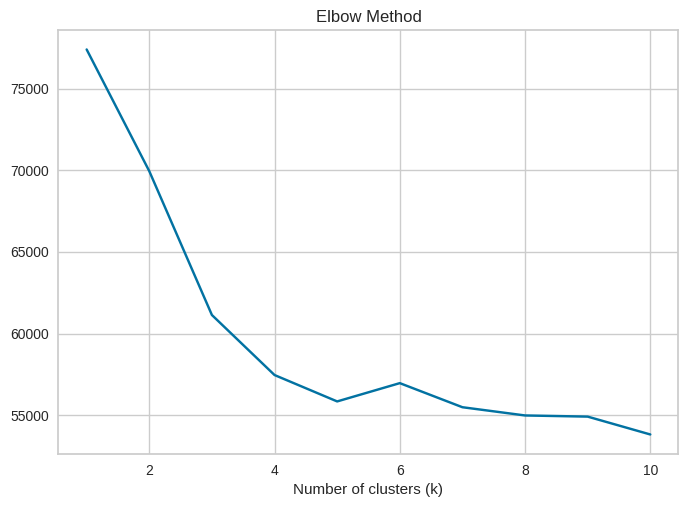

In [ ]:
k_values = range(1, 11)

cohesion_values = []

for k in k_values:
    km = KModes(n_clusters=k)
    clusters = km.fit_predict(df1)
    cohesion = km.cost_
    cohesion_values.append(cohesion)

plt.plot(k_values, cohesion_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
k=5
km = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1)
clusters = km.fit_predict(df1)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3617, cost: 55515.0
Run 1, iteration: 2/100, moves: 1706, cost: 55204.0
Run 1, iteration: 3/100, moves: 31, cost: 55204.0


In [ ]:
df1['clusters'] = clusters

In [ ]:
df1['clusters'].value_counts()

0    3895
1    2278
2    1407
3    1316
4     927
Name: clusters, dtype: int64

In [ ]:
df1.groupby(by=['clusters'])[['Q3B1','Q3B2','Q3B3','Q4B1','Q4B2','Q4B3']].agg(pd.Series.mode)

,Q3B1,Q3B2,Q3B3,Q4B1,Q4B2,Q4B3
clusters,,,,,,
0,음식/미식 탐방,쇼핑,해당없음,식도락 관광,쇼핑,자연경관 감상
1,쇼핑,음식/미식 탐방,해당없음,쇼핑,식도락 관광,해당없음
2,음식/미식 탐방,자연 풍경 감상,역사/문화유적/전통문화 체험,자연경관 감상,전통문화체험,고궁/역사 유적지 방문
3,자연 풍경 감상,역사/문화유적/전통문화 체험,쇼핑,자연경관 감상,고궁/역사 유적지 방문,쇼핑
4,역사/문화유적/전통문화 체험,음식/미식 탐방,음식/미식 탐방,고궁/역사 유적지 방문,식도락 관광,전통문화체험


In [ ]:
df1.groupby(by=['clusters'])[['Q4A01','Q4A02','Q4A03','Q4A04','Q4A05','Q4A06','Q4A07','Q4A08',
                              'Q4A09','Q4A10','Q4A11','Q4A12','Q4A13','Q4A14','Q4A15','Q4A16','Q4A17']].agg(pd.Series.mode)

,Q4A01,Q4A02,Q4A03,Q4A04,Q4A05,Q4A06,Q4A07,Q4A08,Q4A09,Q4A10,Q4A11,Q4A12,Q4A13,Q4A14,Q4A15,Q4A16,Q4A17
clusters,,,,,,,,,,,,,,,,,
0,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
1,식도락 관광,쇼핑,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
2,해당없음,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,해당없음,해당없음,해당없음,유흥/오락,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
3,해당없음,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
4,식도락 관광,쇼핑,자연경관 감상,고궁/역사 유적지 방문,전통문화체험,"박물관, 전시관 관람",해당없음,해당없음,해당없음,해당없음,유흥/오락,해당없음,해당없음,해당없음,해당없음,해당없음,해당없음
